## Linear Regression

In [ ]:
"""
Linear Regression

Introduction:
Linear regression is a key statistical technique used to analyze and model the relationship between a dependent variable (the outcome) and one or more independent variables (the predictors).
This method is based on the premise that there exists a linear correlation between the input features and the output variable.

Mathematical Formulation:
The linear regression model can be expressed mathematically as:
Y = X * W + ε
Where:
- Y represents the target vector (dependent variable).
- X denotes the feature matrix (independent variables).
- W signifies the weight vector (model parameters).
- ε stands for the error term (random noise).

Mechanism of Linear Regression:
1. **Training the Model**: The objective of the model is to determine the optimal weights (W) that minimize the discrepancy between the predicted values and the actual target values.
   This is commonly achieved through the least squares approach, which aims to minimize the total of the squared differences (errors).

2. **Gradient Descent Optimization**: In this implementation, we utilize gradient descent to refine the weights.
   The algorithm iteratively adjusts the weights in a direction that decreases the loss function, which quantifies the prediction error of the model.

3. **Loss Function**: The loss function employed in linear regression is the Mean Squared Error (MSE), defined as:
   L(W) = (1 / (2N)) * Σ(Y_pred - Y)^2
   where N represents the number of samples.

Use Cases of Linear Regression:
- **Predictive Analysis**: Linear regression is extensively applied for forecasting continuous outcomes, such as predicting sales, real estate values, and stock market trends.
- **Trend Identification**: It aids in comprehending the relationships between variables and recognizing patterns within data.
- **Assessing Feature Significance**: Linear regression can highlight which features have the most substantial impact on predicting the target variable.

Drawbacks:
- Linear regression presumes a linear relationship between the predictors and the target variable.
- It is vulnerable to outliers, which can greatly influence the model's accuracy.
- The method may struggle with complex, non-linear relationships.

"""

Iteration 100: Loss = 0.007364908942538328
Iteration 200: Loss = 0.004803219888873599
Iteration 300: Loss = 0.004337636038571364
Iteration 400: Loss = 0.0042510637696220035
Iteration 500: Loss = 0.0042342512068973956
Iteration 600: Loss = 0.00423073028915761
Iteration 700: Loss = 0.004229905259988747
Iteration 800: Loss = 0.0042296840805993744
Iteration 900: Loss = 0.004229616874765443
Iteration 1000: Loss = 0.0042295944906625286
Final weights: [3.0110373  1.95770557 1.00340993]


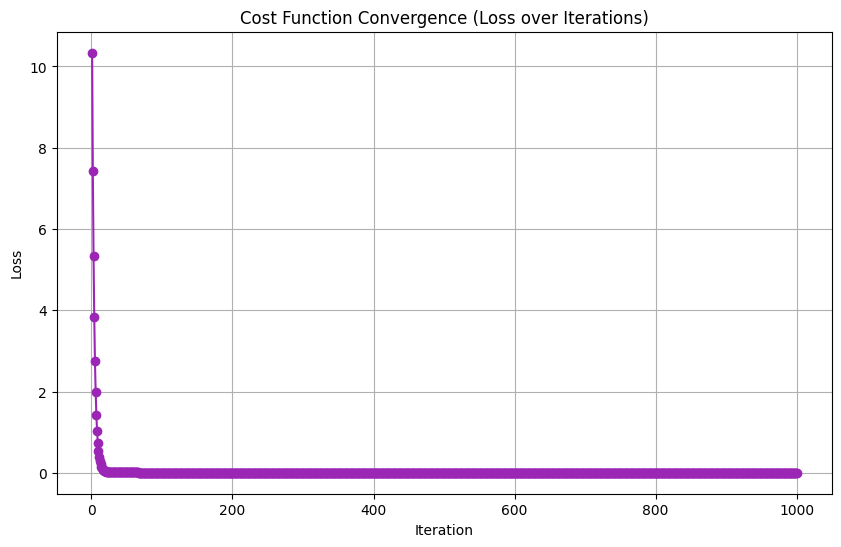

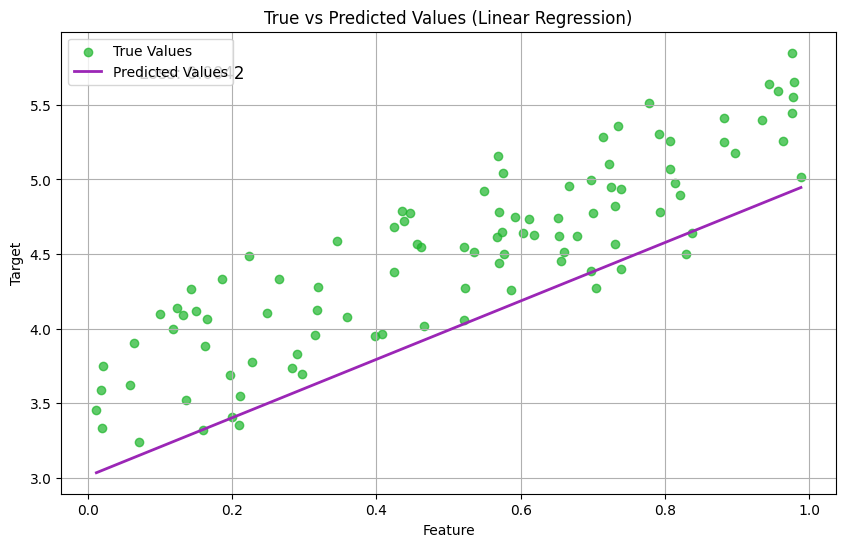

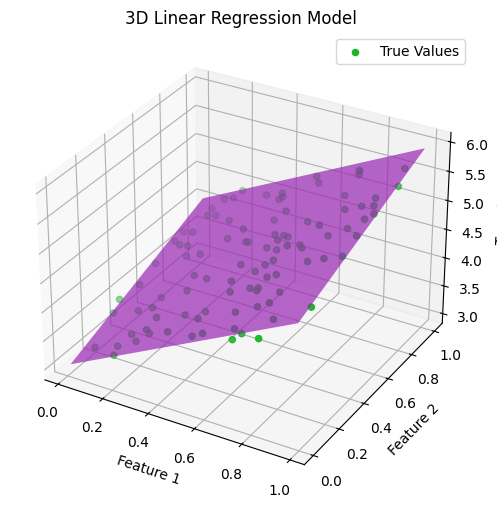

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):

        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.W_final = None
        self.loss_history = []

    def fit(self, X, Y):
        """
        Train the linear regression model using the provided data.

        Parameters:
        - X: Feature matrix of shape N x (d + 1) (includes bias term).
        - Y: Target vector of shape N x 1.
        """
        N, d_plus_1 = X.shape  # N: number of samples, d_plus_1: number of features (including bias)
        self.W_final = np.zeros((d_plus_1, 1))  # Initialize weights (W) to zero

        iteration = 1
        while iteration <= self.max_iterations:
            Y_pred = X @ self.W_final  # Matrix multiplication to obtain predictions

            error = Y_pred - Y  # Difference between predicted and actual values

            loss = (1 / (2 * N)) * np.sum(error ** 2)  # Least squares loss function
            self.loss_history.append(loss)  # Store loss for plotting

            gradient = (1 / N) * (X.T @ error)  # Gradient calculation

            self.W_final -= self.learning_rate * gradient

            iteration += 1

            if iteration % 100 == 0 or iteration == self.max_iterations:
                print(f"Iteration {iteration}: Loss = {loss}")

    def predict(self, X):

        return X @ self.W_final  # Matrix multiplication to obtain predictions

# Plotting Functions
def plot_loss_convergence(loss_history):
    """Plot the loss over iterations."""
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(loss_history) + 1), loss_history, color='#9B26B6', marker='o')
    plt.title('Cost Function Convergence (Loss over Iterations)')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

def plot_true_vs_predicted(X, Y, model):
    """
    Plot the true vs predicted values with a continuous line representing the model.
    """
    plt.figure(figsize=(10, 6))

    # Scatter plot for true values
    plt.scatter(X[:, 1], Y, color='#1DB52B', label='True Values', alpha=0.7)

    x_line = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    x_line = x_line.reshape(-1, 1)
    x_line_with_bias = np.hstack([np.ones((x_line.shape[0], 1)), x_line, np.zeros_like(x_line)])


    y_line = model.predict(x_line_with_bias)  # Now input to predict is (100, 3)

    plt.plot(x_line, y_line, color='#9B26B6', label='Predicted Values', linewidth=2)

    # Calculate and display loss
    loss = (1 / (2 * X.shape[0])) * np.sum((model.predict(X) - Y) ** 2)
    plt.text(0.1, 0.9, f'Loss: {loss:.4f}', transform=plt.gca().transAxes, fontsize=12)

    # Titles and labels
    plt.title('True vs Predicted Values (Linear Regression)')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_3d_regression(X, Y, model):
    """Plot the 3D Linear Regression Model (Data points and Regression Plane)."""
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for true values
    ax.scatter(X[:, 1], X[:, 2], Y, color='#1DB52B', label='True Values')

    # Create a grid to plot the regression plane
    x1_range = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    x2_range = np.linspace(np.min(X[:, 2]), np.max(X[:, 2]), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    X_grid = np.c_[np.ones_like(x1_grid.flatten()), x1_grid.flatten(), x2_grid.flatten()]

    Y_grid = model.predict(X_grid)

    Y_grid = Y_grid.reshape(x1_grid.shape)

    ax.plot_surface(x1_grid, x2_grid, Y_grid, color='#9B26B6', alpha=0.7, rstride=100, cstride=100)

    ax.set_title('3D Linear Regression Model')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Target')
    ax.legend()
    plt.show()

# Example
if __name__ == "__main__":
    np.random.seed(0)
    N = 100  # Number of samples
    d = 2    # Number of features
    X = np.random.rand(N, d)  # Generate random feature matrix (2 features)
    X = np.hstack((np.ones((N, 1)), X))  # Add a column of ones for the bias term
    true_weights = np.array([[3], [2], [1]])  # Define true weights (including bias)
    Y = X @ true_weights + np.random.normal(0, 0.1, (N, 1))  # Generate target values with noise

    # Create and train the linear regression model
    model = LinearRegression(learning_rate=0.1, max_iterations=1000)
    model.fit(X, Y)

    Y_pred = model.predict(X)

    # Print final weights
    print("Final weights:", model.W_final.flatten())

    # Plotting the results using the functions
    plot_loss_convergence(model.loss_history)
    plot_true_vs_predicted(X, Y, model)
    plot_3d_regression(X, Y, model)
